In [80]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
data_folder = os.getcwd() + "/Dataset/"
train = "train.csv"
test = "test.csv"


In [4]:
df = pd.read_csv(data_folder+train)

In [5]:
df.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                10000 non-null  int64  
 1   Diplomatic_Meetings_Set       10000 non-null  int64  
 2   Percent_Of_Forces_Mobilized   10000 non-null  float64
 3   Hostile_Nations               10000 non-null  int64  
 4   Active_Threats                10000 non-null  float64
 5   Inactive_Threats              10000 non-null  float64
 6   Citizen_Fear_Index            10000 non-null  float64
 7   Closest_Threat_Distance(km)   10000 non-null  float64
 8   Aircraft_Carriers_Responding  10000 non-null  int64  
 9   Troops_Mobilized(thousands)   10000 non-null  float64
 10  DEFCON_Level                  10000 non-null  int64  
 11  ID                            10000 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


In [87]:
df_dl = df["DEFCON_Level"].value_counts()

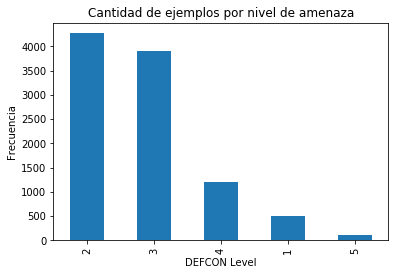

In [96]:
df_dl.plot(kind="bar")
plt.title("Cantidad de ejemplos por nivel de amenaza")
plt.ylabel("Frecuencia")
plt.xlabel("DEFCON Level")
plt.show()

In [95]:
df_dl/100

2    42.70
3    39.10
4    12.12
1     4.98
5     1.10
Name: DEFCON_Level, dtype: float64

Vemos que la cantidad de ejemplos por cada nivel de amenaza, no están distribuidos de forma pareja a lo largo del dataset. Por ejemplo, 42,7% de los datos corresponde al defcon 2 mientras que solo el 1,1% es defcon5. 
Al momento de entrenar nuestros modelos, tendremos que ocuparnos de este problema, de lo contrario, transferiremos este sezgo a nuestras predicciones.


In [12]:
df["Diplomatic_Meetings_Set"].value_counts()

1    5233
0    4763
2       4
Name: Diplomatic_Meetings_Set, dtype: int64

In [64]:
df["Diplomatic_Meetings_Set"] = np.where(df["Diplomatic_Meetings_Set"]>1,1,df["Diplomatic_Meetings_Set"])

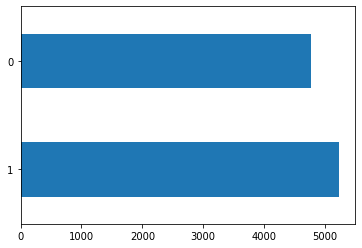

In [81]:
df["Diplomatic_Meetings_Set"].value_counts().plot(kind="barh")

In [66]:
diplomatic_df = df.groupby(by="DEFCON_Level")["Diplomatic_Meetings_Set"].value_counts().rename("count").to_frame()

In [67]:
diplomatic_df = (diplomatic_df/ diplomatic_df.groupby(level=0).sum()) * 100

In [74]:
diplomatic_df

count
DEFCON_Level Diplomatic_Meetings_Set           
1            1                        75.301205
             0                        24.698795
2            1                        63.255269
             0                        36.744731
3            0                        52.890026
             1                        47.109974
4            0                        75.247525
             1                        24.752475
5            0                        82.727273
             1                        17.272727

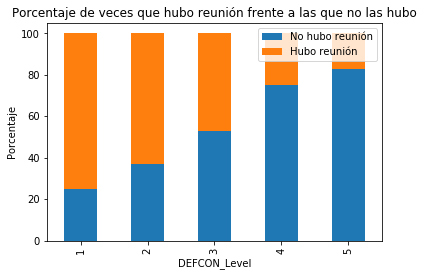

In [84]:
diplomatic_df.unstack().plot(kind='bar',stacked=True)
plt.legend(["No hubo reunión", "Hubo reunión"])
plt.title("Porcentaje de veces que hubo reunión frente a las que no las hubo")
plt.ylabel("Porcentaje")
plt.show()

Al parecer, hubo o no hubo una reunión diplomática. Solo 4 casos en los que hubo más de 1, en 10k de filas, es un outlier. Por simplicidad, lo voy a remplazar por 1. Vemos que en nuestro dataset, hay más casos en los que si hubo una reunión pero no nos dice nada sobre lo que querémos predecir: el próximo defcon level.
Para poder extrarle mayor información a este dato debo agrupar por nivel de amenaza.
El próximo gráfico es muy enriquecedor, queda claro que a mayor nivel de amenaza, las reuniones son cada vez menores.
Siendo que, en el menor de nivel de amenaza, 75% de la veces hubo una reunión para tratar de mitigar el conflicto y en el mayor nivel de amenaza 82% de las veces, no la hubo. 

*** IDEA GENERAL, REDACTAR MEJOR Y AGREGAR MÁS CONTENIDO ***

## Allied_Nations

In [98]:
df["Allied_Nations"].value_counts().sort_values()

15       7
16      27
14      28
13     144
5      179
11     451
12     475
6      872
10    1052
9     1447
7     2498
8     2820
Name: Allied_Nations, dtype: int64

In [102]:
df["Allied_Nations"].describe()

count    10000.000000
mean         8.317800
std          1.748802
min          5.000000
25%          7.000000
50%          8.000000
75%          9.000000
max         16.000000
Name: Allied_Nations, dtype: float64

Vemos que en nuestro dataset, la cantidad mínima de naciones aliadas es de 5 y el máximo  de 16. 
Siendo 8 la moda y la mediana, 8,31 el promedio y 1,74 el desvío standard. 

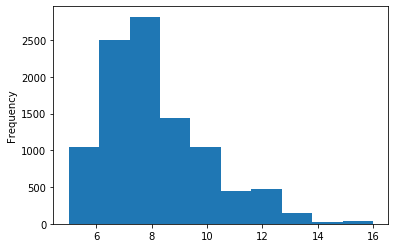

In [9]:
df["Allied_Nations"].plot(kind="hist")

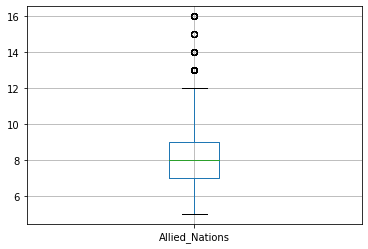

In [104]:
df.boxplot(column="Allied_Nations")

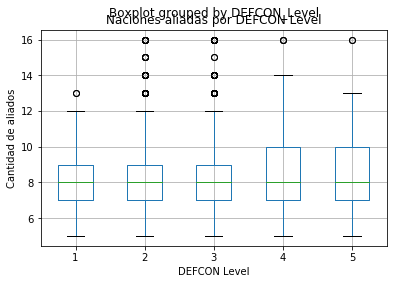

In [110]:
df.boxplot(column="Allied_Nations", by="DEFCON_Level")
plt.title("Naciones aliadas por DEFCON Level")
plt.xlabel("DEFCON Level")
plt.ylabel("Cantidad de aliados")
plt.show()

A simple vista, vemos que hay una asimetría positiva, con una cola hacia la derecha.
Entre 7 y 9, se concentra el 50% de los datos, mientras que el 50% restante varía entre 8 y 16, lo que explica la cola larga en el histograma y el bigote superior, esos valores tienen una dispersión mucho más amplia.
El box plot, nos muestra que una cantidad mayor a 13 naciones aliadas, es un valor atípico.
Analizar esta variable aislada, no nos brinda mucha información nueva. Por lo que agrupamos por nivel defcon.
A simple vista, no parece ser un gran predictor esta variable. Las cajas por nivel, no muestran un cambio tan significativo, por lo menos hasta el 3er nivel DEFCON.
El 4 y el 5, vemos que hay muchísima dispersión a partir del 2do cuartil. EL 50% superior de los datos, varía entre 8 y 16, mientras que el otro 50% entre 4(5) y 16. También es destacable que solo en estos niveles, el 75% de los datos, tienen valores menores a 10, mientras que en los primeros 3 niveles, tiene valores menores a 9.

No parece haber una correlación muy marcada entre DEFCON_Level y Allied_Nations, si bien es cierto que en los 2 niveles más altos, cantidades altas de aliados dejan de ser valores atípicos, la mediana y la media son prácticamente las mismas para cada nivel de amenaza, indicando que el DEFCON_Level no depende de la cantidad de aliados.

*** RETOCAR EL % DE DATOS ENTRE LOS VALORES ***

## Percent_Of_Forces_Mobilized

In [114]:
df["Percent_Of_Forces_Mobilized"].value_counts()

0.00    898
0.49    416
0.02    297
0.24    289
0.08    252
       ... 
0.62      8
0.79      7
0.71      6
0.75      6
1.00      6
Name: Percent_Of_Forces_Mobilized, Length: 80, dtype: int64

In [115]:
df["Percent_Of_Forces_Mobilized"].describe()

count    10000.000000
mean         0.270548
std          0.196434
min          0.000000
25%          0.090000
50%          0.260000
75%          0.430000
max          1.000000
Name: Percent_Of_Forces_Mobilized, dtype: float64

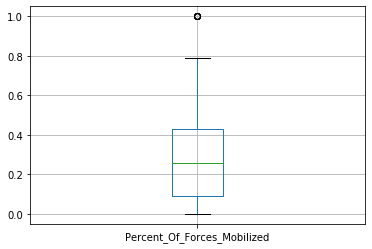

In [116]:
df.boxplot(column="Percent_Of_Forces_Mobilized")

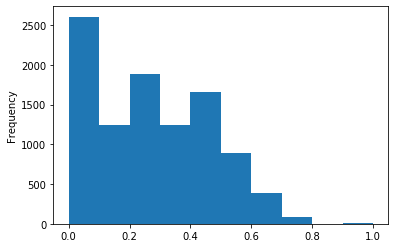

In [113]:
df["Percent_Of_Forces_Mobilized"].plot(kind="hist")

Es una variable cuantitativa, continua. Con una moda en 0, lo que significa que no se movilizaron tropas y un máximo en 1, siendo todo lo contrario. 
Este valor lo toman solo 6 observaciones, que parecen ser outliers y lo confirmamos con el diagrama de cajas. Los valores que superan el tercer quartil(0.43) tienen una dispersión relativamente alta, dando lugar a un bigote largo en el extremo superior. No nos aporta mucha información.
Por otro lado la media se ubica en 0.27 y la std 0.196434, que explica la alta dispersión de los datos.

Agrupar por nivel de amenaza, parece mucho más enriquecedor. Vemos que tanto la media como la medidana, aumenta por cada nivel de amenaza.Confirmando al sentido común, que nos dice que a mayor nivel de amenaza debería haber un mayor moviemiento de tropas.
También confirmamos que para todos los niveles 1 es un valor atípico, ni siquiera en el último nivel se mueven más del 80% de las tropas. 
Para el primer nivel, movilizar más del 60% de las tropas, es algo atípico. Siendo la media del 18% y el 75% de los datos no supera el 30%.
En el segundo y el tercer nivel, vemos las cajas y los rangos intercuartílicos más altos, indicando que son niveles dónde el % de movilización de las tropas, varía muchísimo.
Los últimos niveles, tienen rangos intercuartílicos mucho más acotados, siendo q1 ~0.25 y q3 ~ 0.5. Indicando que para estos, el desvío es mucho más pequeño.


In [130]:
df.groupby(by="DEFCON_Level")["Percent_Of_Forces_Mobilized"].mean()

DEFCON_Level
1    0.182088
2    0.252555
3    0.272670
4    0.351898
5    0.397727
Name: Percent_Of_Forces_Mobilized, dtype: float64

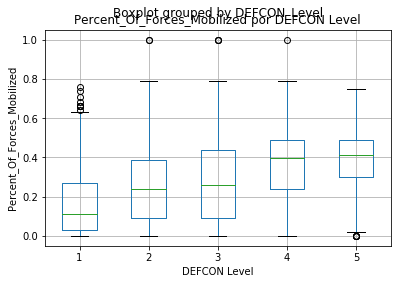

In [120]:
df.boxplot(column="Percent_Of_Forces_Mobilized", by="DEFCON_Level")
plt.title("Percent_Of_Forces_Mobilized por DEFCON Level")
plt.xlabel("DEFCON Level")
plt.ylabel("Percent_Of_Forces_Mobilized")
plt.show()